# NeuroRegressor - Multiple Regression Example

In [1]:
import EvolutionaryComputation.NeuroEvolution as ne

## Iris Dataset 
Goal is to predict both sepal and petal widths given their length and species

In [2]:
from sklearn.datasets import load_iris
from scipy.stats import zscore
import pandas as pd
import numpy as np

In [3]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# Preprocessing

In [4]:
# number of observations
n = len(iris.data)

# create indices
ind = np.asarray(range(0, n))
# shuffle
np.random.shuffle(ind)

# percentages
train = 0.6  
val = 0.8 

# train, val, test indices
train_ind = ind[0:int(train*n)]  # train is 60% of data
val_ind = ind[int(train*n):int(val*n)]  # validation is 20% of data
test_ind = ind[int(val*n):n]  # test is 20% of data

In [5]:
x = pd.DataFrame(iris.data, columns = iris.feature_names)
# convert to numpy array
x = np.asarray(x)

# scale between 0 and 1
mx = np.max(x, axis=0)
mn = np.min(x, axis=0)
x = (x-mn)/(mx-mn)

# rewrite x for features and y for targets
x = np.hstack((x, np.asarray(pd.get_dummies(iris['target']))))
y = x[:, [0, 2]]
x = x[:, [1, 3, 4, 5, 6]]

In [6]:
x[0:5]

array([[0.625     , 0.04166667, 1.        , 0.        , 0.        ],
       [0.41666667, 0.04166667, 1.        , 0.        , 0.        ],
       [0.5       , 0.04166667, 1.        , 0.        , 0.        ],
       [0.45833333, 0.04166667, 1.        , 0.        , 0.        ],
       [0.66666667, 0.04166667, 1.        , 0.        , 0.        ]])

In [7]:
y[0:5]

array([[0.22222222, 0.06779661],
       [0.16666667, 0.06779661],
       [0.11111111, 0.05084746],
       [0.08333333, 0.08474576],
       [0.19444444, 0.06779661]])

# Testing Models
Because the `greedy` algorithm creates $8$ offspring per set of parents, a total of $O(8*n*m)$ models are created, where *n* refers to the generation size and *m* refers to the number of generations. On the other hand, `self-adaptive` algorithm only creates $4$ offspring per set of parents. Lastly, the `generic` algorithm creates $4$ offspring per set of parents. In order to accurately compare the algorithms for the given dataset, all models will have the same population size of $25$, and activation function, $relu$; but, their maximum number of generations will diff such that only $20000$ models are created. 
- `greedy`: max_epoch=100
- `generic`: max_epoch=200
- `self-adaptive`: max_epoch=200

In [8]:
layer_nodes = [50, 50, 50]  # three hidden layers, 50 nodes each
num_input = x.shape[1]  # number of variables
num_output = 2
population_size = 25

## Greedy Algorithm

In [32]:
model1 = ne.NeuroRegressor(layer_nodes=layer_nodes, num_input=num_input, num_output=num_output,
                         population_size=population_size, activation_function='relu')

In [33]:
model1.evolve(max_epoch=100, batch_size=50, train_data=[x[train_ind], y[train_ind]], val_data=[x[val_ind], y[val_ind]],
             early_stopping=True, verbose=True,
             warm_start=False, algorithm='greedy', patience=15)

Number of Trainable Parameters Per Network: 5501
Epoch 1/100
 Batch 2/2   Results for Batch: Best Loss: 0.0660663 Mean Loss: 0.0969207 Val Loss: 0.1209703
Epoch 2/100
 Batch 2/2   Results for Batch: Best Loss: 0.0499436 Mean Loss: 0.0598 Val Loss: 0.0689005237
Epoch 3/100
 Batch 2/2   Results for Batch: Best Loss: 0.039334 Mean Loss: 0.0490173 Val Loss: 0.05706253
Epoch 4/100
 Batch 2/2   Results for Batch: Best Loss: 0.0262051 Mean Loss: 0.0317702 Val Loss: 0.0396065
Epoch 5/100
 Batch 2/2   Results for Batch: Best Loss: 0.016433 Mean Loss: 0.0207868 Val Loss: 0.0289218
Epoch 6/100
 Batch 2/2   Results for Batch: Best Loss: 0.0125279 Mean Loss: 0.0143459 Val Loss: 0.0226654
Epoch 7/100
 Batch 2/2   Results for Batch: Best Loss: 0.0097956 Mean Loss: 0.0119955 Val Loss: 0.0197354
Epoch 8/100
 Batch 2/2   Results for Batch: Best Loss: 0.0091801 Mean Loss: 0.0101266 Val Loss: 0.0177431
Epoch 9/100
 Batch 2/2   Results for Batch: Best Loss: 0.0083725 Mean Loss: 0.0088729 Val Loss: 0.016074

Epoch 79/100
 Batch 2/2   Results for Batch: Best Loss: 0.0069443 Mean Loss: 0.0069443 Val Loss: 0.0126102
Epoch 80/100
 Batch 2/2   Results for Batch: Best Loss: 0.0069443 Mean Loss: 0.0069443 Val Loss: 0.0126102
Epoch 81/100
 Batch 2/2   Results for Batch: Best Loss: 0.0069443 Mean Loss: 0.0069443 Val Loss: 0.0126102
Epoch 82/100
 Batch 2/2   Results for Batch: Best Loss: 0.0069443 Mean Loss: 0.0069946 Val Loss: 0.0126686
Epoch 83/100
 Batch 2/2   Results for Batch: Best Loss: 0.0069443 Mean Loss: 0.0069443 Val Loss: 0.0126102
Epoch 84/100
 Batch 2/2   Results for Batch: Best Loss: 0.0069443 Mean Loss: 0.0070056 Val Loss: 0.0126708
Epoch 85/100
 Batch 2/2   Results for Batch: Best Loss: 0.0069443 Mean Loss: 0.0069652 Val Loss: 0.0126361
Epoch 86/100
 Batch 2/2   Results for Batch: Best Loss: 0.0069195 Mean Loss: 0.0069409 Val Loss: 0.0126097
Epoch 87/100
 Batch 2/2   Results for Batch: Best Loss: 0.0069195 Mean Loss: 0.0069253 Val Loss: 0.0126069
Epoch 88/100
 Batch 2/2   Results for

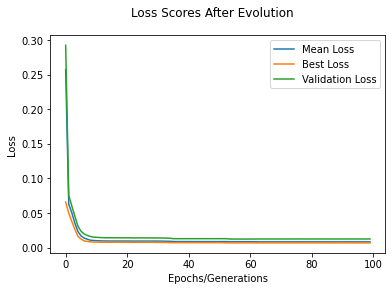

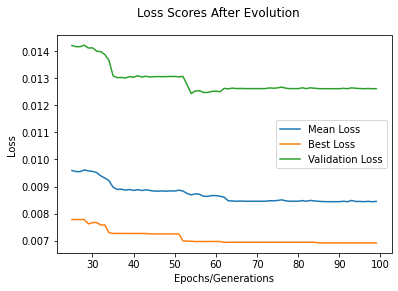

In [34]:
model1.plot(starting_gen=0)
model1.plot(starting_gen=25)

# Generic Algorithm

In [18]:
model2 = ne.NeuroRegressor(layer_nodes=layer_nodes, num_input=num_input, num_output=num_output,
                         population_size=population_size, activation_function='relu')

In [19]:
model2.evolve(max_epoch=200, batch_size=50, train_data=[x[train_ind], y[train_ind]], val_data=[x[val_ind], y[val_ind]],
             early_stopping=True, verbose=True,
             warm_start=False, algorithm='generic', patience=15)

Number of Trainable Parameters Per Network: 5501
Epoch 1/200
 Batch 2/2   Results for Batch: Best Loss: 0.0600572 Mean Loss: 0.1561789 Val Loss: 0.2050597
Epoch 2/200
 Batch 2/2   Results for Batch: Best Loss: 0.0567324 Mean Loss: 0.1253135 Val Loss: 0.1711419
Epoch 3/200
 Batch 2/2   Results for Batch: Best Loss: 0.0542094 Mean Loss: 0.0928995 Val Loss: 0.1271925
Epoch 4/200
 Batch 2/2   Results for Batch: Best Loss: 0.0542094 Mean Loss: 0.0759195 Val Loss: 0.1043346
Epoch 5/200
 Batch 2/2   Results for Batch: Best Loss: 0.0542094 Mean Loss: 0.0651576 Val Loss: 0.0847457
Epoch 6/200
 Batch 2/2   Results for Batch: Best Loss: 0.0509311 Mean Loss: 0.0592452 Val Loss: 0.0718896
Epoch 7/200
 Batch 2/2   Results for Batch: Best Loss: 0.0480802 Mean Loss: 0.0550013 Val Loss: 0.0666352
Epoch 8/200
 Batch 2/2   Results for Batch: Best Loss: 0.0430157 Mean Loss: 0.0500741 Val Loss: 0.0597666
Epoch 9/200
 Batch 2/2   Results for Batch: Best Loss: 0.0400561 Mean Loss: 0.0449016 Val Loss: 0.05406

 Batch 2/2   Results for Batch: Best Loss: 0.0074583 Mean Loss: 0.0076514 Val Loss: 0.0131414
Epoch 79/200
 Batch 2/2   Results for Batch: Best Loss: 0.0074661 Mean Loss: 0.0076012 Val Loss: 0.0131225
Epoch 80/200
 Batch 2/2   Results for Batch: Best Loss: 0.0074755 Mean Loss: 0.0075504 Val Loss: 0.0130949
Epoch 81/200
 Batch 2/2   Results for Batch: Best Loss: 0.0074755 Mean Loss: 0.0075388 Val Loss: 0.0130891
Epoch 82/200
 Batch 2/2   Results for Batch: Best Loss: 0.0074882 Mean Loss: 0.0075125 Val Loss: 0.0130722
Epoch 83/200
 Batch 2/2   Results for Batch: Best Loss: 0.0074882 Mean Loss: 0.0075039 Val Loss: 0.0130644
Epoch 84/200
 Batch 2/2   Results for Batch: Best Loss: 0.0074882 Mean Loss: 0.0075004 Val Loss: 0.0130604
Epoch 85/200
 Batch 2/2   Results for Batch: Best Loss: 0.0074882 Mean Loss: 0.0074982 Val Loss: 0.0130578
Epoch 86/200
 Batch 2/2   Results for Batch: Best Loss: 0.0074882 Mean Loss: 0.0074966 Val Loss: 0.0130557
Epoch 87/200
 Batch 2/2   Results for Batch: Best 

 Batch 2/2   Results for Batch: Best Loss: 0.0073027 Mean Loss: 0.0073302 Val Loss: 0.0126519
Epoch 157/200
 Batch 2/2   Results for Batch: Best Loss: 0.0073031 Mean Loss: 0.0073042 Val Loss: 0.0126187
Epoch 158/200
 Batch 2/2   Results for Batch: Best Loss: 0.0073036 Mean Loss: 0.0073041 Val Loss: 0.0126184
Epoch 159/200
 Batch 2/2   Results for Batch: Best Loss: 0.0073038 Mean Loss: 0.0073041 Val Loss: 0.0126184
Epoch 160/200
 Batch 2/2   Results for Batch: Best Loss: 0.0073039 Mean Loss: 0.0073041 Val Loss: 0.0126184
Epoch 161/200
 Batch 2/2   Results for Batch: Best Loss: 0.007304 Mean Loss: 0.0073041 Val Loss: 0.01261844
Epoch 162/200
 Batch 2/2   Results for Batch: Best Loss: 0.0073041 Mean Loss: 0.0073041 Val Loss: 0.0126184
Epoch 163/200
 Batch 2/2   Results for Batch: Best Loss: 0.0073041 Mean Loss: 0.0073041 Val Loss: 0.0126184
Epoch 164/200
 Batch 2/2   Results for Batch: Best Loss: 0.0073041 Mean Loss: 0.0073041 Val Loss: 0.0126184
Epoch 165/200
 Batch 2/2   Results for Bat

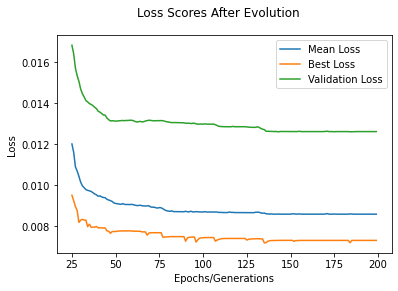

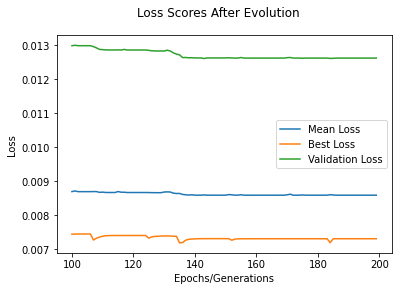

In [20]:
model2.plot(starting_gen=25)
model2.plot(starting_gen=100)

# Self-Adaptive Algorithm

In [9]:
model3 = ne.NeuroRegressor(layer_nodes=layer_nodes, num_input=num_input, num_output=num_output,
                         population_size=population_size, activation_function='relu')

In [10]:
model3.evolve(max_epoch=200, batch_size=50, train_data=[x[train_ind], y[train_ind]], val_data=[x[val_ind], y[val_ind]],
             early_stopping=True, verbose=True,
             warm_start=False, algorithm='self-adaptive', patience=15)

Number of Trainable Parameters Per Network: 5501
Epoch 1/200
 Batch 2/2   Results for Batch: Best Loss: 0.1080925 Mean Loss: 0.1470072 Val Loss: 0.1468027
Epoch 2/200
 Batch 2/2   Results for Batch: Best Loss: 0.0774403 Mean Loss: 0.0965906 Val Loss: 0.0948864
Epoch 3/200
 Batch 2/2   Results for Batch: Best Loss: 0.0607185 Mean Loss: 0.0736672 Val Loss: 0.0707402
Epoch 4/200
 Batch 2/2   Results for Batch: Best Loss: 0.0470019 Mean Loss: 0.0577161 Val Loss: 0.0539319
Epoch 5/200
 Batch 2/2   Results for Batch: Best Loss: 0.0363018 Mean Loss: 0.0457393 Val Loss: 0.0409855
Epoch 6/200
 Batch 2/2   Results for Batch: Best Loss: 0.0310718 Mean Loss: 0.0372077 Val Loss: 0.0340961
Epoch 7/200
 Batch 2/2   Results for Batch: Best Loss: 0.0259154 Mean Loss: 0.0309983 Val Loss: 0.028252
Epoch 8/200
 Batch 2/2   Results for Batch: Best Loss: 0.0205426 Mean Loss: 0.025262 Val Loss: 0.0227621
Epoch 9/200
 Batch 2/2   Results for Batch: Best Loss: 0.0173806 Mean Loss: 0.0214134 Val Loss: 0.0190324

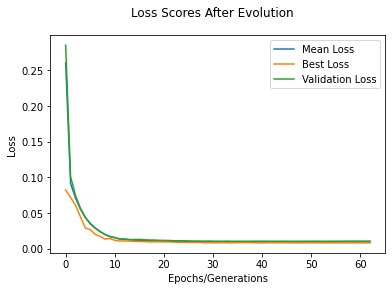

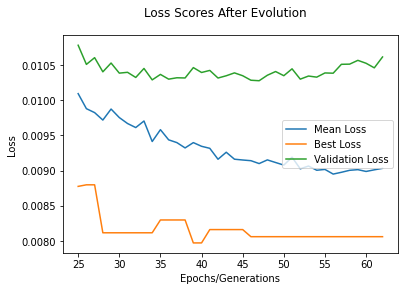

In [17]:
model3.plot(0)
model3.plot(starting_gen=25)

# Comparing Models
We will compare by use of $R^2$ score through the validation data

In [13]:
from sklearn.metrics import r2_score

In [27]:
r1 = r2_score(y[val_ind], model1.predict(x[val_ind]))
r2 = r2_score(y[val_ind], model2.prcallback = [EarlyStopping(monitor='loss', patience=10), EarlyStopping(monitor='val_loss', patience=10)]edict(x[val_ind]))
r3 = r2_score(y[val_ind], model3.predict(x[val_ind]))
print("Greedy: {}, Generic: {}, Self-Adaptive: {}".format(r1, r2, r3))

Greedy: 0.8130943259061122, Generic: 0.8073282671156319, Self-Adaptive: 0.8399098483179746


As we can see, all models performed relatively well, achieving $R^2$ values above $0.80$, meaning that they explain over $80$% of the variability of the target variables. However, we can see that the `self-adaptive` yeilded the best result, so we will use it as the final model

# Testing Final Model

In [28]:
r3 = r2_score(y[test_ind], model3.predict(x[test_ind]))
r3

0.8525659135558559

As we can see, from the test data our final model performs extremely well, explaining $85$% of the variability of the data. 

# Predicted Values in Original Form

In [29]:
# convert back into original form
(model3.predict(x[test_ind])*(mx[[0,2]]-mn[[0,2]])+mn[[0,2]])[0:5]

array([[6.23310833, 5.26505621],
       [6.11151266, 4.37423557],
       [6.67549179, 5.79414302],
       [4.99219642, 1.33697465],
       [5.80812026, 4.15476491]])

# Actual Values in Original Form

In [30]:
(y[test_ind]*(mx[[0,2]]-mn[[0,2]])+mn[[0,2]])[0:5]

array([[6.7, 5.8],
       [5.6, 4.1],
       [7.7, 6.1],
       [4.8, 1.6],
       [6.3, 4.9]])

# Compare Against Same Model Trained Through Numerical Methods

In [9]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
inputs = tf.keras.Input(shape=(num_input,))
m = layers.Dense(50, activation='relu')(inputs)
m = layers.Dense(50, activation='relu')(m)
m = layers.Dense(50, activation='relu')(m)
outputs = layers.Dense(num_output, activation='relu')(m)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                300       
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 102       
Total params: 5,502
Trainable params: 5,502
Non-trainable params: 0
_________________________________________________________________


In [23]:
callback = [EarlyStopping(monitor='loss', patience=10), EarlyStopping(monitor='val_loss', patience=10)]
history = model.fit(x[train_ind], y[train_ind], epochs=500, validation_data=(x[val_ind], y[val_ind]), 
          callbacks=callback)

Epoch 1/500
3/3 [==============================] - 1s 115ms/step - loss: 0.2404 - val_loss: 0.2147
Epoch 2/500
3/3 [==============================] - 0s 21ms/step - loss: 0.1666 - val_loss: 0.1391
Epoch 3/500
3/3 [==============================] - 0s 22ms/step - loss: 0.0990 - val_loss: 0.0823
Epoch 4/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0548 - val_loss: 0.0457
Epoch 5/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0276 - val_loss: 0.0283
Epoch 6/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0205 - val_loss: 0.0212
Epoch 7/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0189 - val_loss: 0.0164
Epoch 8/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0171 - val_loss: 0.0116
Epoch 9/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0140 - val_loss: 0.0096
Epoch 10/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0120 - val_loss: 0.0109
Epoch 11/500
3/3 [

In [27]:
r2_score(y[val_ind], model.predict(x[val_ind]))

0.8571640308660942

As we can see, the Keras model with the same architecture achieved a higher $R^2$ value for the validation set than the best model by $2$%, revealing that the numerical method optimizer performed better for this regression test.